In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df_image_fitzpatrick_new = pd.read_csv('datasets/fitzpatrick/fitzpatrick_with_recommendation.csv')
df_image_fitzpatrick_new.head()

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,III,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,Tan (tan skin w/ neutral undertones),0.866667
1,10.jpg,30-39,Male,Middle Eastern,V,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,Tan (tan skin w/ neutral undertones),0.866667
2,100.jpg,20-29,Female,East Asian,III,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,Tan (tan skin w/ neutral undertones),0.866667
3,1000.jpg,30-39,Male,White,I & II,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,Tan (tan skin w/ neutral undertones),0.866667
4,10004.jpg,40-49,Male,Indian,V,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,Tan (tan skin w/ neutral undertones),0.866667


# Using only 3000 samples from each product class

In [3]:
print(f'Total data: {df_image_fitzpatrick_new.shape[0]}')
print(f'Number of features: {df_image_fitzpatrick_new.shape[1]}')

Total data: 39939
Number of features: 26


In [4]:
df_image_fitzpatrick_new.get("product").unique()

array(['Tan (tan skin w/ neutral undertones)',
       'Dark Neutral (medium dark skin w/ neutral undertones)',
       'Fair Golden (fair skin w/ neutral or golden undertones)',
       'Fair Pink (fair skin w/ neutral or pink undertones)',
       'Medium Neutral (medium skin w/ neutral undertones)',
       'Medium Golden (medium skin w/ golden undertones)'], dtype=object)

In [5]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       38531
Dark Neutral (medium dark skin w/ neutral undertones)        634
Fair Golden (fair skin w/ neutral or golden undertones)      318
Fair Pink (fair skin w/ neutral or pink undertones)          264
Medium Neutral (medium skin w/ neutral undertones)           115
Medium Golden (medium skin w/ golden undertones)              77
Name: count, dtype: int64

In [6]:
# df_image_fitzpatrick_new = df_image_fitzpatrick_new.groupby('product').head(3000)

In [7]:
df_image_fitzpatrick_new.get("product").value_counts()

product
Tan (tan skin w/ neutral undertones)                       38531
Dark Neutral (medium dark skin w/ neutral undertones)        634
Fair Golden (fair skin w/ neutral or golden undertones)      318
Fair Pink (fair skin w/ neutral or pink undertones)          264
Medium Neutral (medium skin w/ neutral undertones)           115
Medium Golden (medium skin w/ golden undertones)              77
Name: count, dtype: int64

In [8]:
le_fitzpatrick = LabelEncoder()
df_image_fitzpatrick_new['product'] = le_fitzpatrick.fit_transform(df_image_fitzpatrick_new['product'])

In [10]:
df_image_fitzpatrick_new

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,III,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,5,0.866667
1,10.jpg,30-39,Male,Middle Eastern,V,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,5,0.866667
2,100.jpg,20-29,Female,East Asian,III,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,5,0.866667
3,1000.jpg,30-39,Male,White,I & II,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,5,0.866667
4,10004.jpg,40-49,Male,Indian,V,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,5,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39934,9476.jpg,30-39,Female,Black,VI,13.470643,147.794364,128.370994,13.464066,91.496672,...,110.0,6,169,123,6,84,128,0.503416,5,0.866667
39935,9501.jpg,40-49,Female,Black,VI,20.292730,108.283861,131.563835,20.354831,105.746193,...,68.0,7,102,156,7,122,63,0.515937,5,0.866667
39936,9560.jpg,30-39,Female,Black,VI,6.820392,188.809431,53.937221,6.838867,34.513811,...,148.0,6,170,54,6,34,153,0.211519,5,0.866667
39937,9561.jpg,20-29,Female,Black,VI,9.870436,177.025849,97.407346,9.860112,64.856744,...,134.0,10,165,102,10,70,122,0.381990,5,0.866667


In [11]:
df_image_fitzpatrick_new.describe().T

,count,mean,std,min,25%,50%,75%,max
hsv_mean_h,39939.0,21.908837,31.762843,0.000000,8.202896,10.427894,15.768475,177.083386
hsv_mean_s,39939.0,119.238722,37.784254,0.000000,93.544234,117.541394,142.832619,253.101802
hsv_mean_v,39939.0,150.826723,44.887873,14.946189,118.809401,151.868882,183.839336,253.330895
hsl_mean_h,39939.0,22.185352,32.068666,0.000000,8.241400,10.476722,16.027683,177.081294
hsl_mean_s,39939.0,117.379729,39.176495,9.234594,88.946439,116.016362,144.438506,250.905174
hsl_mean_l,39939.0,106.307094,41.299418,0.000000,77.723364,100.550403,128.925891,252.303013
hsv_median_h,39939.0,18.082163,37.829441,0.000000,6.000000,8.000000,11.000000,179.000000
hsv_median_s,39939.0,118.880856,39.200980,0.000000,92.000000,117.000000,143.000000,255.000000
hsv_median_v,39939.0,154.128947,48.348967,13.000000,119.000000,155.000000,190.000000,255.000000
hsl_median_h,39939.0,18.325947,38.279239,0.000000,6.000000,8.000000,11.000000,179.000000


In [12]:
df_image_fitzpatrick_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file                   39939 non-null  object 
 1   age                    39939 non-null  object 
 2   gender                 39939 non-null  object 
 3   race                   39939 non-null  object 
 4   phototype              39939 non-null  object 
 5   hsv_mean_h             39939 non-null  float64
 6   hsv_mean_s             39939 non-null  float64
 7   hsv_mean_v             39939 non-null  float64
 8   hsl_mean_h             39939 non-null  float64
 9   hsl_mean_s             39939 non-null  float64
 10  hsl_mean_l             39939 non-null  float64
 11  hsv_median_h           39939 non-null  float64
 12  hsv_median_s           39939 non-null  float64
 13  hsv_median_v           39939 non-null  float64
 14  hsl_median_h           39939 non-null  float64
 15  hs

In [13]:
df_image_fitzpatrick_new["product"].value_counts()

product
5    38531
0      634
1      318
2      264
4      115
3       77
Name: count, dtype: int64

In [14]:
features_fitzpatrick = [
    "hsv_mean_h",
    "hsv_mean_s",
    "hsv_mean_v",
]
selected_fitzpatrick = df_image_fitzpatrick_new[features_fitzpatrick]

<Axes: >

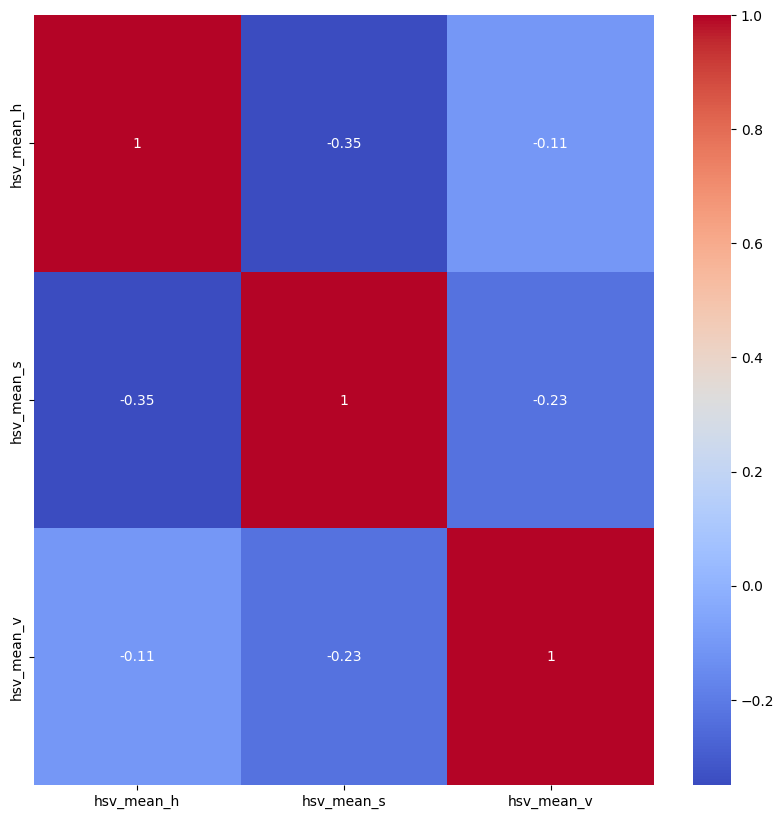

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_fitzpatrick.corr(), annot=True, cmap="coolwarm")

In [16]:
sc_fitzpatrick = StandardScaler()
sc_fitzpatrick.fit(selected_fitzpatrick)
X_fitzpatrick = pd.DataFrame(sc_fitzpatrick.transform(selected_fitzpatrick), columns=features_fitzpatrick)
X_fitzpatrick

,hsv_mean_h,hsv_mean_s,hsv_mean_v
0,-0.065473,0.495079,-2.029367
1,0.770368,-1.386576,0.712720
2,-0.122344,-1.098666,1.710408
3,4.362773,-0.884254,-0.730332
4,-0.291564,-0.461778,-0.208846
...,...,...,...
39934,-0.265666,0.755765,-0.500269
39935,-0.050881,-0.289936,-0.429139
39936,-0.475040,1.841285,-2.158505
39937,-0.379014,1.529416,-1.190077


In [17]:
y_fitzpatrick_product = df_image_fitzpatrick_new["product"]

In [18]:
X_train_fitzpatrick_product, X_test_fitzpatrick_product, y_train_fitzpatrick_product, y_test_fitzpatrick_product = train_test_split(
    X_fitzpatrick,
    y_fitzpatrick_product,
    test_size=0.3,
    random_state=42
)

In [41]:
train_scores_fitzpatrick_product = np.array([])
test_scores_fitzpatrick_product = np.array([])

for i in range(1, 26):
    knn_product = KNeighborsClassifier(n_neighbors=i)
    knn_product.fit(X_train_fitzpatrick_product, y_train_fitzpatrick_product)

    train_scores_fitzpatrick_product = np.append(train_scores_fitzpatrick_product, knn_product.score(X_train_fitzpatrick_product, y_train_fitzpatrick_product))
    test_scores_fitzpatrick_product = np.append(test_scores_fitzpatrick_product, knn_product.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product))

In [42]:
max_train_score_fitzpatrick_product = np.max(train_scores_fitzpatrick_product)
train_scores_ind_fitzpatrick_product = np.where(train_scores_fitzpatrick_product == max_train_score_fitzpatrick_product)[0][0]
print(f"Max train score on Product Features {max_train_score_fitzpatrick_product*100:.2f}% at k = {train_scores_ind_fitzpatrick_product+1}")

Max train score on Product Features 100.00% at k = 1


In [43]:
print("All train scores on Product Features:")
for i, score in enumerate(train_scores_fitzpatrick_product):
    print(f"K = {i+1} :: {score*100:.2f}%")

All train scores on Product Features:
K = 1 :: 100.00%
K = 2 :: 99.16%
K = 3 :: 99.11%
K = 4 :: 98.92%
K = 5 :: 98.87%
K = 6 :: 98.83%
K = 7 :: 98.74%
K = 8 :: 98.72%
K = 9 :: 98.72%
K = 10 :: 98.67%
K = 11 :: 98.66%
K = 12 :: 98.63%
K = 13 :: 98.61%
K = 14 :: 98.61%
K = 15 :: 98.57%
K = 16 :: 98.60%
K = 17 :: 98.58%
K = 18 :: 98.54%
K = 19 :: 98.52%
K = 20 :: 98.50%
K = 21 :: 98.49%
K = 22 :: 98.48%
K = 23 :: 98.48%
K = 24 :: 98.45%
K = 25 :: 98.41%


In [44]:
max_test_score_fitzpatrick_product = np.max(test_scores_fitzpatrick_product)
test_scores_ind_fitzpatrick_product = np.where(test_scores_fitzpatrick_product == max_test_score_fitzpatrick_product)[0][0]
print(f"Max test score on Product Features {max_test_score_fitzpatrick_product*100:.2f}% at k = {test_scores_ind_fitzpatrick_product+1}")

Max test score on Product Features 98.41% at k = 8


In [45]:
print("All test scores on Product Features:")
for i, score in enumerate(test_scores_fitzpatrick_product):
    print(f"K = {i+1} :: {score*100:.2f}%")

All test scores on Product Features:
K = 1 :: 98.11%
K = 2 :: 98.25%
K = 3 :: 98.17%
K = 4 :: 98.36%
K = 5 :: 98.40%
K = 6 :: 98.35%
K = 7 :: 98.39%
K = 8 :: 98.41%
K = 9 :: 98.37%
K = 10 :: 98.35%
K = 11 :: 98.36%
K = 12 :: 98.36%
K = 13 :: 98.31%
K = 14 :: 98.26%
K = 15 :: 98.25%
K = 16 :: 98.26%
K = 17 :: 98.28%
K = 18 :: 98.19%
K = 19 :: 98.20%
K = 20 :: 98.26%
K = 21 :: 98.34%
K = 22 :: 98.29%
K = 23 :: 98.28%
K = 24 :: 98.27%
K = 25 :: 98.23%


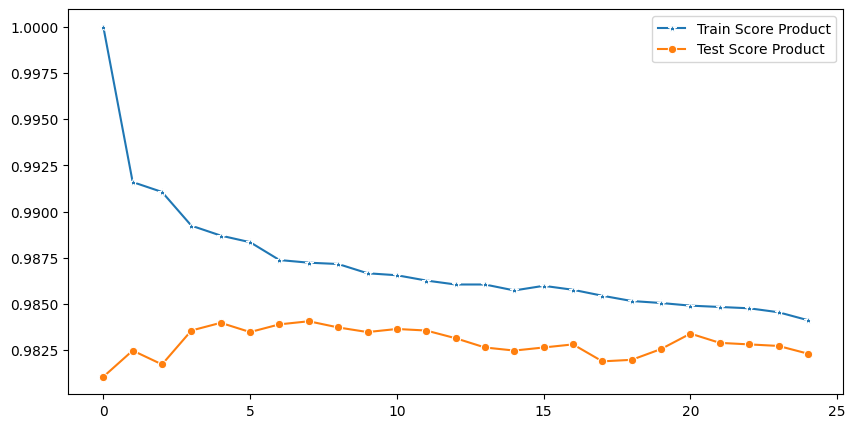

In [46]:
plt.figure(figsize=(10, 5))
line_fitzpatrick_product = sns.lineplot(train_scores_fitzpatrick_product, marker="*", label="Train Score Product")
line_fitzpatrick_product = sns.lineplot(test_scores_fitzpatrick_product, marker="o", label="Test Score Product")

In [47]:
knn_fitzpatrick_product = KNeighborsClassifier(n_neighbors=3)
knn_fitzpatrick_product = knn_fitzpatrick_product.fit(X_train_fitzpatrick_product, y_train_fitzpatrick_product)
knn_fitzpatrick_product.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product)

0.9817225838758137

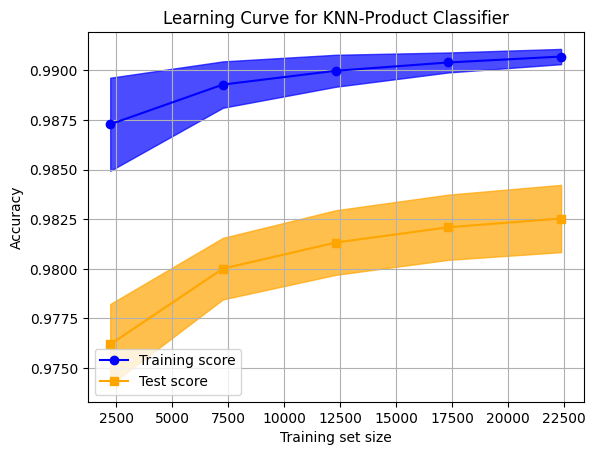

In [48]:
# Define the train_sizes and scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    knn_fitzpatrick_product,
    X_train_fitzpatrick_product,
    y_train_fitzpatrick_product,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    scoring="accuracy",
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training score")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.7, color="blue"
)
plt.plot(train_sizes, test_mean, color="orange", marker="s", label="Test score")
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.7, color="orange"
)

# Set labels and title
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN-Product Classifier")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
y_pred_fitzpatrick_product = knn_fitzpatrick_product.predict(X_test_fitzpatrick_product)
print(classification_report(y_test_fitzpatrick_product, y_pred_fitzpatrick_product))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       207
           1       0.29      0.27      0.28       103
           2       0.74      0.68      0.71        99
           3       0.46      0.24      0.32        25
           4       0.30      0.26      0.28        31
           5       1.00      1.00      1.00     11517

    accuracy                           0.98     11982
   macro avg       0.57      0.53      0.55     11982
weighted avg       0.98      0.98      0.98     11982



In [50]:
knn_cv_fitzpatrick_product = KNeighborsClassifier(n_neighbors=3)
cv_scores_fitzpatrick_product = cross_val_score(knn_cv_fitzpatrick_product, X_fitzpatrick, y_fitzpatrick_product, cv=25)
print("Cross Validation Score on Product")
print(cv_scores_fitzpatrick_product)

Cross Validation Score on Product
[0.98435544 0.98185232 0.98310388 0.98060075 0.98372966 0.98372966
 0.98122653 0.98122653 0.98685857 0.98435544 0.9824781  0.98748436
 0.98748436 0.98310388 0.985598   0.98246713 0.9830933  0.98371947
 0.985598   0.98434565 0.98497182 0.98685034 0.98371947 0.98497182
 0.98246713]


In [51]:
y_pred_fitzpatrick_product = knn_fitzpatrick_product.predict(X_test_fitzpatrick_product)
confusion_matrix(y_test_fitzpatrick_product, y_pred_fitzpatrick_product)
pd.crosstab(y_test_fitzpatrick_product, y_pred_fitzpatrick_product, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,153,41,0,0,1,12,207
1,57,28,2,0,8,8,103
2,3,11,67,7,10,1,99
3,0,1,18,6,0,0,25
4,3,15,4,0,8,1,31
5,16,0,0,0,0,11501,11517
All,232,96,91,13,27,11523,11982


In [52]:
rskf_fitzpatrick_product = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [53]:
param_grid_fitzpatrick_product = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_product = KNeighborsClassifier()
knn_gridcv_fitzpatrick_product = GridSearchCV(knn_fitzpatrick_product, param_grid_fitzpatrick_product, cv=rskf_fitzpatrick_product)
knn_gridcv_fitzpatrick_product.fit(X_fitzpatrick, y_fitzpatrick_product)

print(f"Best score Product Features: {knn_gridcv_fitzpatrick_product.best_score_}")
print(f"Best parameters Product Features: {knn_gridcv_fitzpatrick_product.best_params_}")

Best score Product Features: 0.9848468796847456
Best parameters Product Features: {'n_neighbors': 10}


#### Save the Model to Pickle

In [116]:
pd.to_pickle(knn_fitzpatrick_product, "models/knn-product.pkl")

# Use SMOTE

We use SMOTE to oversample the minority classes to have the same number of samples as the majority class.

In [29]:
smote_product = SMOTE(k_neighbors=3)
X_train_balanced, y_train_balanced = smote_product.fit_resample(
    X_train_fitzpatrick_product,
    y_train_fitzpatrick_product
)

In [30]:
# find the total data after SMOTE
print("Total data after SMOTE", len(X_train_balanced))

Total data after SMOTE 162084


In [31]:
knn_product_smote = KNeighborsClassifier(n_neighbors=3)
knn_product_smote = knn_product_smote.fit(X_train_balanced, y_train_balanced)
knn_product_smote.score(X_test_fitzpatrick_product, y_test_fitzpatrick_product)

0.9796361208479386

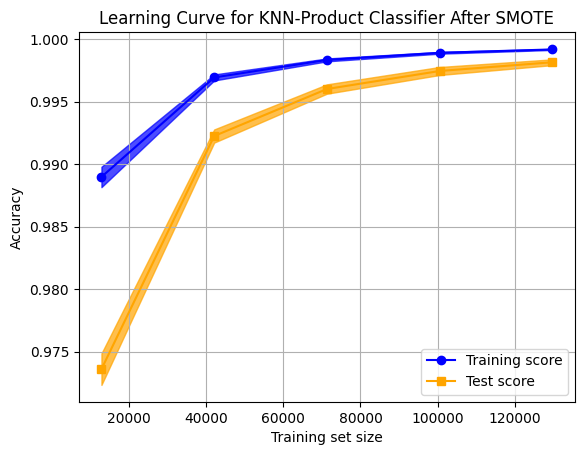

In [32]:
# Define the train_sizes and scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    knn_product_smote,
    X_train_balanced,
    y_train_balanced,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    scoring="accuracy",
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training score")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.7, color="blue"
)
plt.plot(train_sizes, test_mean, color="orange", marker="s", label="Test score")
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.7, color="orange"
)

# Set labels and title
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN-Product Classifier After SMOTE")
plt.legend()
plt.grid(True)
plt.show()

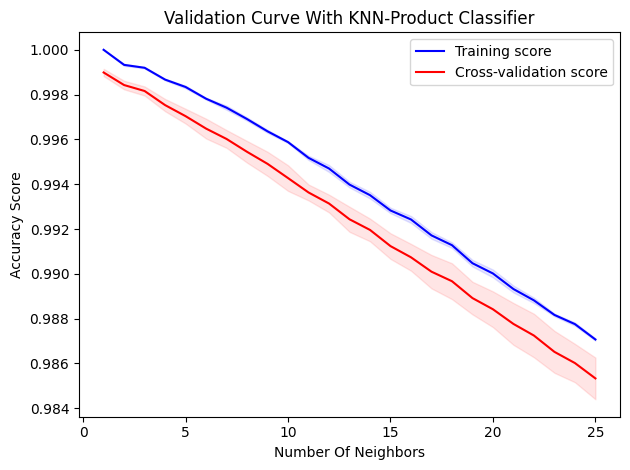

In [33]:
# display a validation curve
param_range = np.arange(1, 26)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X=X_train_balanced,
    y=y_train_balanced,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(
    param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1
)
plt.fill_between(
    param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1
)

# Create plot
plt.title("Validation Curve With KNN-Product Classifier")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [34]:
y_pred_clf = knn_product_smote.predict(X_test_fitzpatrick_product)
print(classification_report(y_test_fitzpatrick_product, y_pred_clf))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       207
           1       0.30      0.42      0.35       103
           2       0.78      0.70      0.73        99
           3       0.42      0.32      0.36        25
           4       0.31      0.48      0.38        31
           5       1.00      1.00      1.00     11517

    accuracy                           0.98     11982
   macro avg       0.57      0.59      0.58     11982
weighted avg       0.98      0.98      0.98     11982



In [35]:
knn_smote_cv = KNeighborsClassifier(n_neighbors=3)
cv_score_smote = cross_val_score(knn_product_smote, X_fitzpatrick, y_fitzpatrick_product, cv=25)
print("Cross Validation Score on Product")
print(cv_score_smote)

Cross Validation Score on Product
[0.98435544 0.98185232 0.98310388 0.98060075 0.98372966 0.98372966
 0.98122653 0.98122653 0.98685857 0.98435544 0.9824781  0.98748436
 0.98748436 0.98310388 0.985598   0.98246713 0.9830933  0.98371947
 0.985598   0.98434565 0.98497182 0.98685034 0.98371947 0.98497182
 0.98246713]


In [36]:
y_pred_cm = knn_product_smote.predict(X_test_fitzpatrick_product)
confusion_matrix(y_test_fitzpatrick_product, y_pred_cm)
pd.crosstab(y_test_fitzpatrick_product, y_pred_cm, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,132,68,1,0,3,3,207
1,37,43,0,1,19,3,103
2,1,9,69,9,11,0,99
3,0,0,17,8,0,0,25
4,0,12,2,1,15,1,31
5,34,11,0,0,1,11471,11517
All,204,143,89,19,49,11478,11982


In [37]:
rskf_fitzpatrick_product_smote = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [38]:
param_grid_fitzpatrick_product_smote = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_product_smote_grid = KNeighborsClassifier()
knn_gridcv_fitzpatrick_product_smote = GridSearchCV(knn_fitzpatrick_product_smote_grid, param_grid_fitzpatrick_product_smote, cv=rskf_fitzpatrick_product_smote)
knn_gridcv_fitzpatrick_product_smote.fit(X_fitzpatrick, y_fitzpatrick_product)

print(f"Best score Product Features: {knn_gridcv_fitzpatrick_product_smote.best_score_}")
print(f"Best parameters Product Features: {knn_gridcv_fitzpatrick_product_smote.best_params_}")

Best score Product Features: 0.9848468796847456
Best parameters Product Features: {'n_neighbors': 10}


In [39]:
unseen_data_product = np.array([110.87840136054422, 101.3015873015873, 211.65433673469389
])
test_unseen_product = knn_product_smote.predict(unseen_data_product.reshape(1, -1))
print(f"Predicted Product: {le_fitzpatrick.inverse_transform(test_unseen_product)[0]}")

Predicted Product: Medium Golden (medium skin w/ golden undertones)


e:\AndrewData\IT\GitHub\fores\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Save the SMOTE Model to Pickle

In [40]:
pd.to_pickle(knn_product_smote, "models/knn-product-smote.pkl")